# 예전모델

In [1]:
from numpy import loadtxt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

def calculate_accuracy(model, x_test, y_test):
    # make predictions
    y_pred = model.predict(x_test)
    predictions = [round(value) for value in y_pred]
    
    # evaluations
    accuracy = accuracy_score(y_test, predictions)
    print('Accuracy: %.2f%%' % (accuracy * 100.0))
    return accuracy

# load data
dataset = loadtxt('pima-indians-diabetes.csv', delimiter=',')
# split data into X and Y
X = dataset[:, 0:8]
y = dataset[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

# fit model into training-data
model = XGBClassifier()
model.fit(x_train, y_train)

# 예전모델
calculate_accuracy(model, x_test, y_test)

Accuracy: 74.03%


0.7402597402597403

# 개선된 모델

In [2]:
# https://xgboost.readthedocs.io/en/latest/parameter.html#parameters-for-tree-booster

model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.03,
    n_estimators=150,
    reg_alpha =0.15,
    reg_lambda=0.7,
    max_depth=4,
    subsample=1
)
model.fit(
    x_train, 
    y_train,
    eval_metric='map',
    verbose=True
)

print(model.evals_result)
calculate_accuracy(model, x_test, y_test)

<bound method XGBClassifier.evals_result of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.03, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=150, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0.15,
              reg_lambda=0.7, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)>
Accuracy: 84.42%


0.8441558441558441

In [6]:
import numpy as np

patient = {
    'Pregnancies': [1], 
    'Glucose': [161], 
    'BloodPressure': [72], 
    'SkinThickness': [35], 
    'Insulin': [0], 
    'BMI': [28.1], 
    'DiabetesPedigreeFunction': [0.527], 
    'Age': [20]
}
value_patient = [1, 161, 72, 35, 0, 28.1, 0.527, 20]

l = model.predict_proba(np.asarray(value_patient).reshape(1,8))
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0], l[0][1]))

No diabetes: 51.25%
 Yes diabetes: 48.75%


In [7]:
np.asarray(value_patient).reshape(1,8)

array([[  1.   , 161.   ,  72.   ,  35.   ,   0.   ,  28.1  ,   0.527,
         20.   ]])

In [9]:
# pima indians diabetes
"""
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Class variable (0 or 1) -- diabetes
"""
names = [
    '# of preganant',
    'Glucose concentration',
    'Blood pressure',
    'Skin fold thinckness',
    '2-hour insulin',
    'BMI',
    'Diabetes pedigree',
    'Age',
    'Result'
]

# XGBClassifier

class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, verbosity=1, silent=None, objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, colsample_bynode=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

https://xgboost.readthedocs.io/en/latest/python/python_api.html

# Leaf value

https://stackoverflow.com/questions/40926340/what-does-the-value-of-leaf-in-the-following-xgboost-model-tree-diagram-means

For a classification tree with 2 classes {0,1}, the value of the leaf node represent the raw score for class 1. It can be converted to a probability score by using the logistic function. The calculation below use the left most leaf as an example.

1/(1+np.exp(-1*0.167528))=0.5417843204057448
What this means is if a data point ends up being distributed to this leaf, the probability of this data point being class 1 is 0.5417843204057448.

In [8]:
import numpy as np

def print_prob(leaf_value):
    result = 1/(1+np.exp(-1*leaf_value))
    print('{:.2%}'.format(result))
    return result

print_prob(-0.11200003)

47.20%


0.4720292251878975

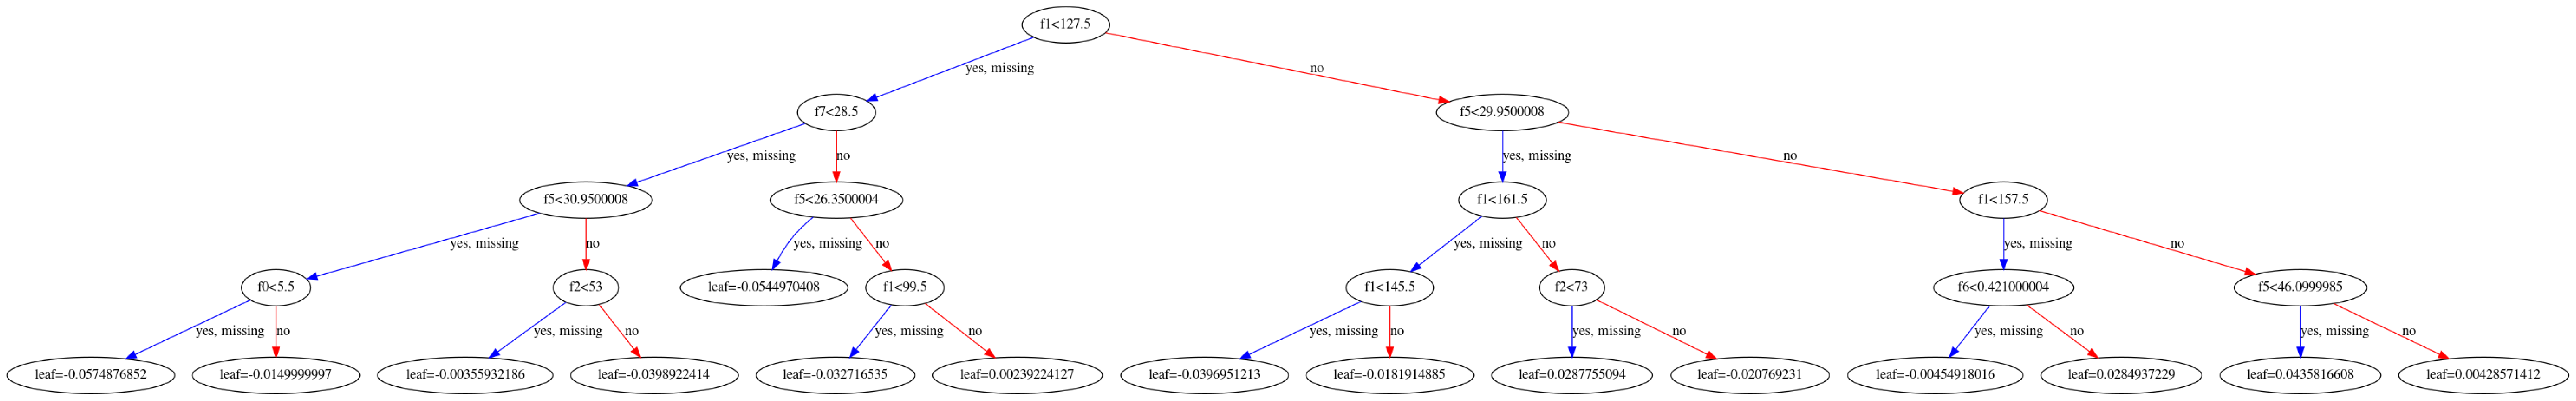

In [10]:
%matplotlib inline
import os
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

import matplotlib.pyplot as plt

from xgboost import plot_tree
from matplotlib.pylab import rcParams

##set up the parameters
rcParams['figure.figsize'] = 100,200

plot_tree(model)
plt.show()

614 154


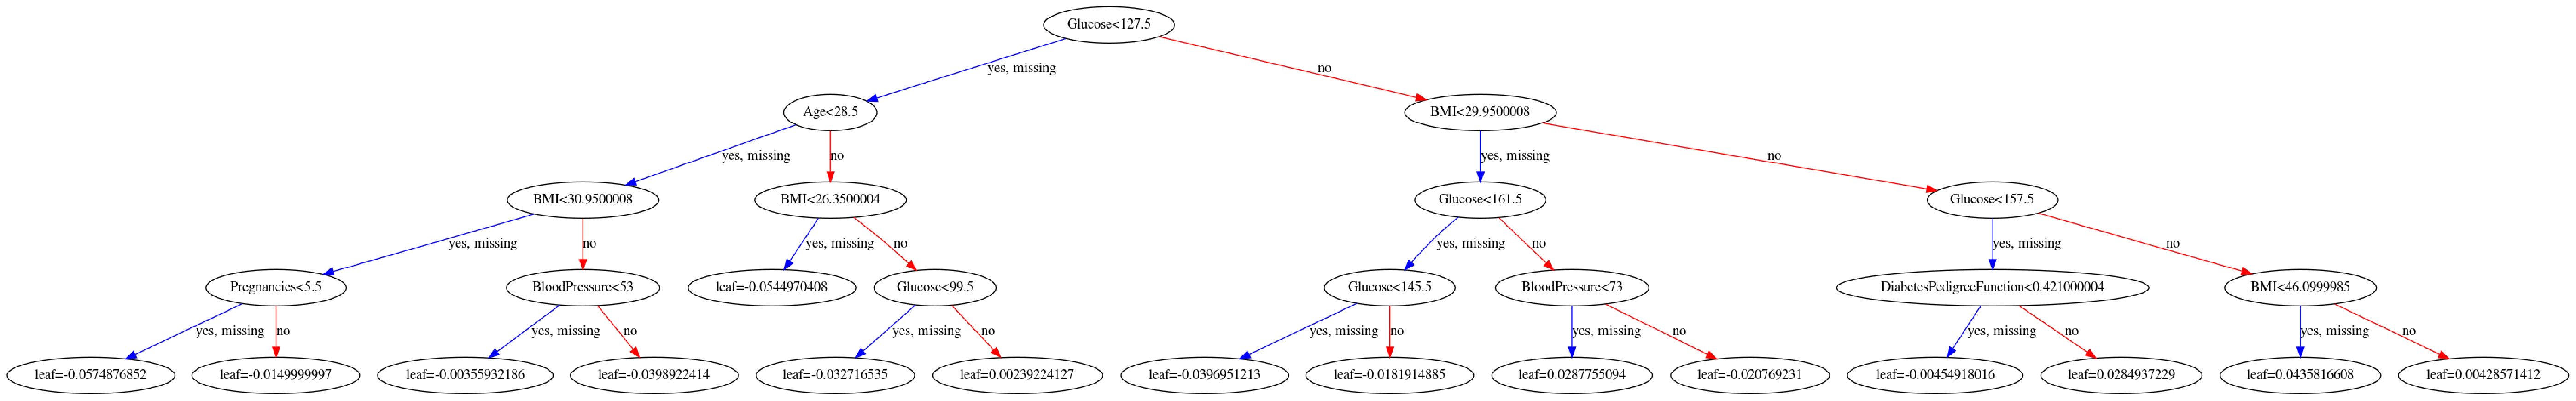

Accuracy: 84.42%


In [11]:
%matplotlib inline
import os
# after pip install graphviz
#os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

# plot decision tree
from numpy import loadtxt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_tree
import matplotlib.pyplot as plt

from matplotlib.pylab import rcParams
##set up the parameters
rcParams['figure.figsize'] = 100,200

# load data
dataset = pd.read_csv('diabetes.csv', delimiter=",")

# split data into X and y
X = dataset.iloc[:, 0:8]
y = dataset.iloc[:, 8]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)
print(len(y_train), len(y_test))

# fit model no training data
model = XGBClassifier(
    booster='gbtree',
    objective='binary:logistic',
    learning_rate=0.03,
    n_estimators=150,
    reg_alpha =0.15,
    reg_lambda=0.7,
    max_depth=4,
    subsample=1
)

model.fit(x_train, y_train)
# plot single tree
plot_tree(model)
plt.show()

# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [12]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix
%config InlineBackend.figure_format = 'retina'

cm = confusion_matrix(y_test, y_pred)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
def show_data(cm, print_res = 0):
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    if print_res == 1:
        print('Precision =     {:.3f}'.format(tp/(tp+fp)))
        print('Recall (TPR) =  {:.3f}'.format(tp/(tp+fn)))
        print('Fallout (FPR) = {:.3e}'.format(fp/(fp+tn)))
    return tp/(tp+fp), tp/(tp+fn), fp/(fp+tn)

plot_confusion_matrix(cm, ['0', '1'], )
show_data(cm, print_res=1)

Precision =     0.824
Recall (TPR) =  0.737
Fallout (FPR) = 9.278e-02


(0.8235294117647058, 0.7368421052631579, 0.09278350515463918)

In [49]:
import numpy as np
from sklearn.model_selection  import GridSearchCV
# grid search, Maxmizing the F1-Score
# https://www.kaggle.com/dstuerzer/optimization-of-xgboost
cv_params = {
     'max_depth': np.arange(1, 6, 1), 
#     'min_child_weight': np.arange(1, 4, 1),
     'learning_rate': np.arange(0.05, 0.6, 0.05),
     'n_estimators': np.arange(50, 300, 50),
#     'reg_alpha': np.arange(0.05, 1, 0.05),
#     'reg_lambda': np.arange(0.05, 1, 0.05)
}    # parameters to be tries in the grid search

fix_params = {
   'booster': 'gbtree',
    'objective': 'binary:logistic',
    'learning_rate': 0.03,
    'n_estimators': 150,
    'reg_alpha' : 0.15,
    'reg_lambda': 0.7,
    'max_depth': 4,
}   #other parameters, fixed for the moment 

csv = GridSearchCV(XGBClassifier(**fix_params), 
                   cv_params, 
                   scoring = 'f1', 
                   cv = 5,
                  n_jobs=11)
csv.fit(x_train, y_train)
# show best cross validation score
print(csv.best_score_)
# show best parameter score
print(csv.best_params_)

# make predictions for test data
y_pred = csv.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

for parameter in csv.cv_results_["params"]:
    print(parameter)

0.6418328943223458
{'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 250}
Accuracy: 77.27%
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 50}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 100}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 150}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 200}
{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 250}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 50}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 100}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 150}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 200}
{'learning_rate': 0.05, 'max_depth': 2, 'n_estimators': 250}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 50}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimator

In [14]:
print(print_prob(0.101999916))

52.55%
0.5254778935320195


In [15]:
# make predictions for test data
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.42%


In [16]:
dataset.iloc[:10,0:8]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
5                     0.201   30  
6                     0.248   26  
7                     0.134   29  
8                     0.158   53  
9                     0.232   54

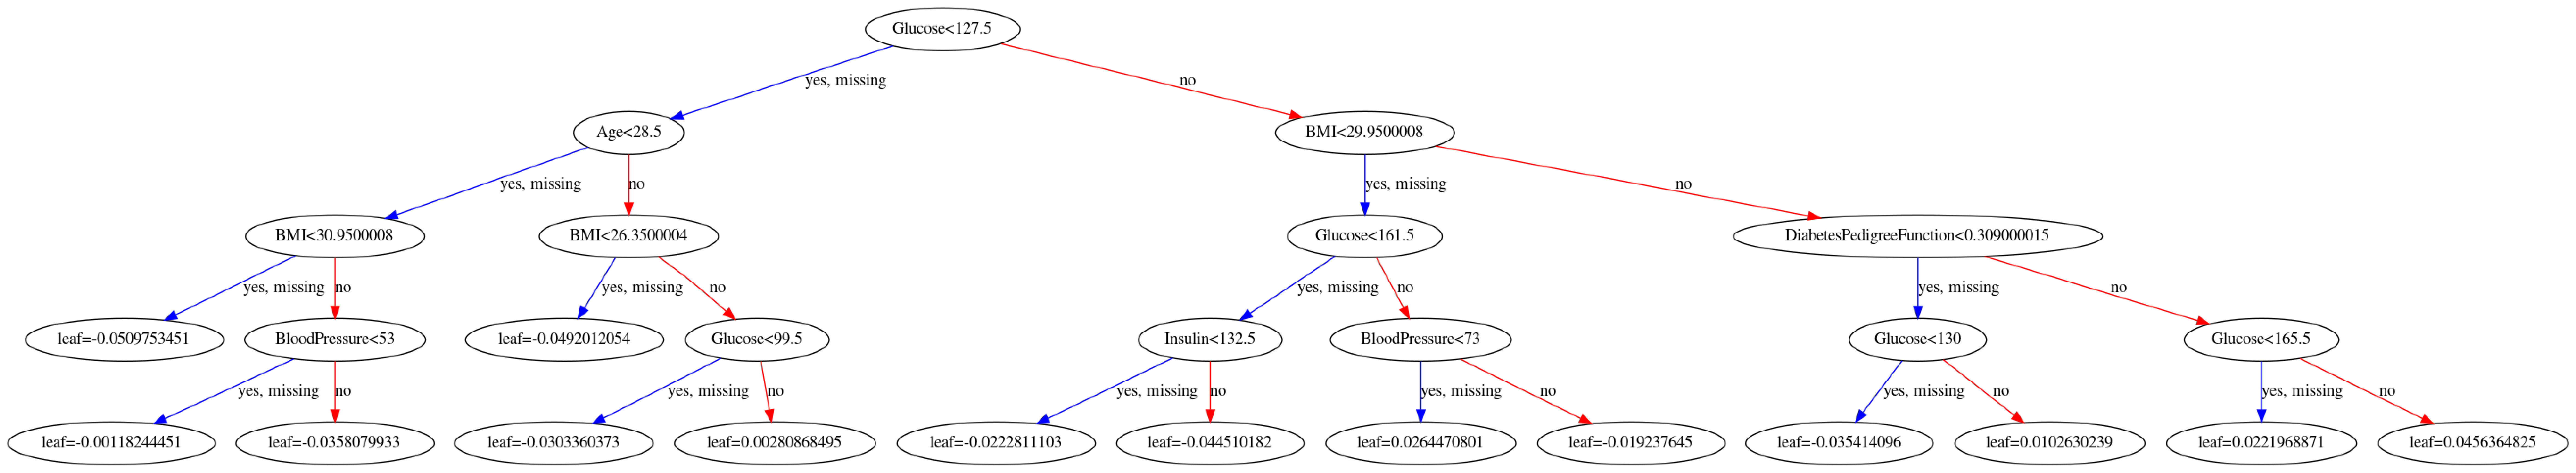

In [17]:
plot_tree(model, num_trees=4)

In [18]:
plot_tree(model, num_trees=0, rankdir='LR')

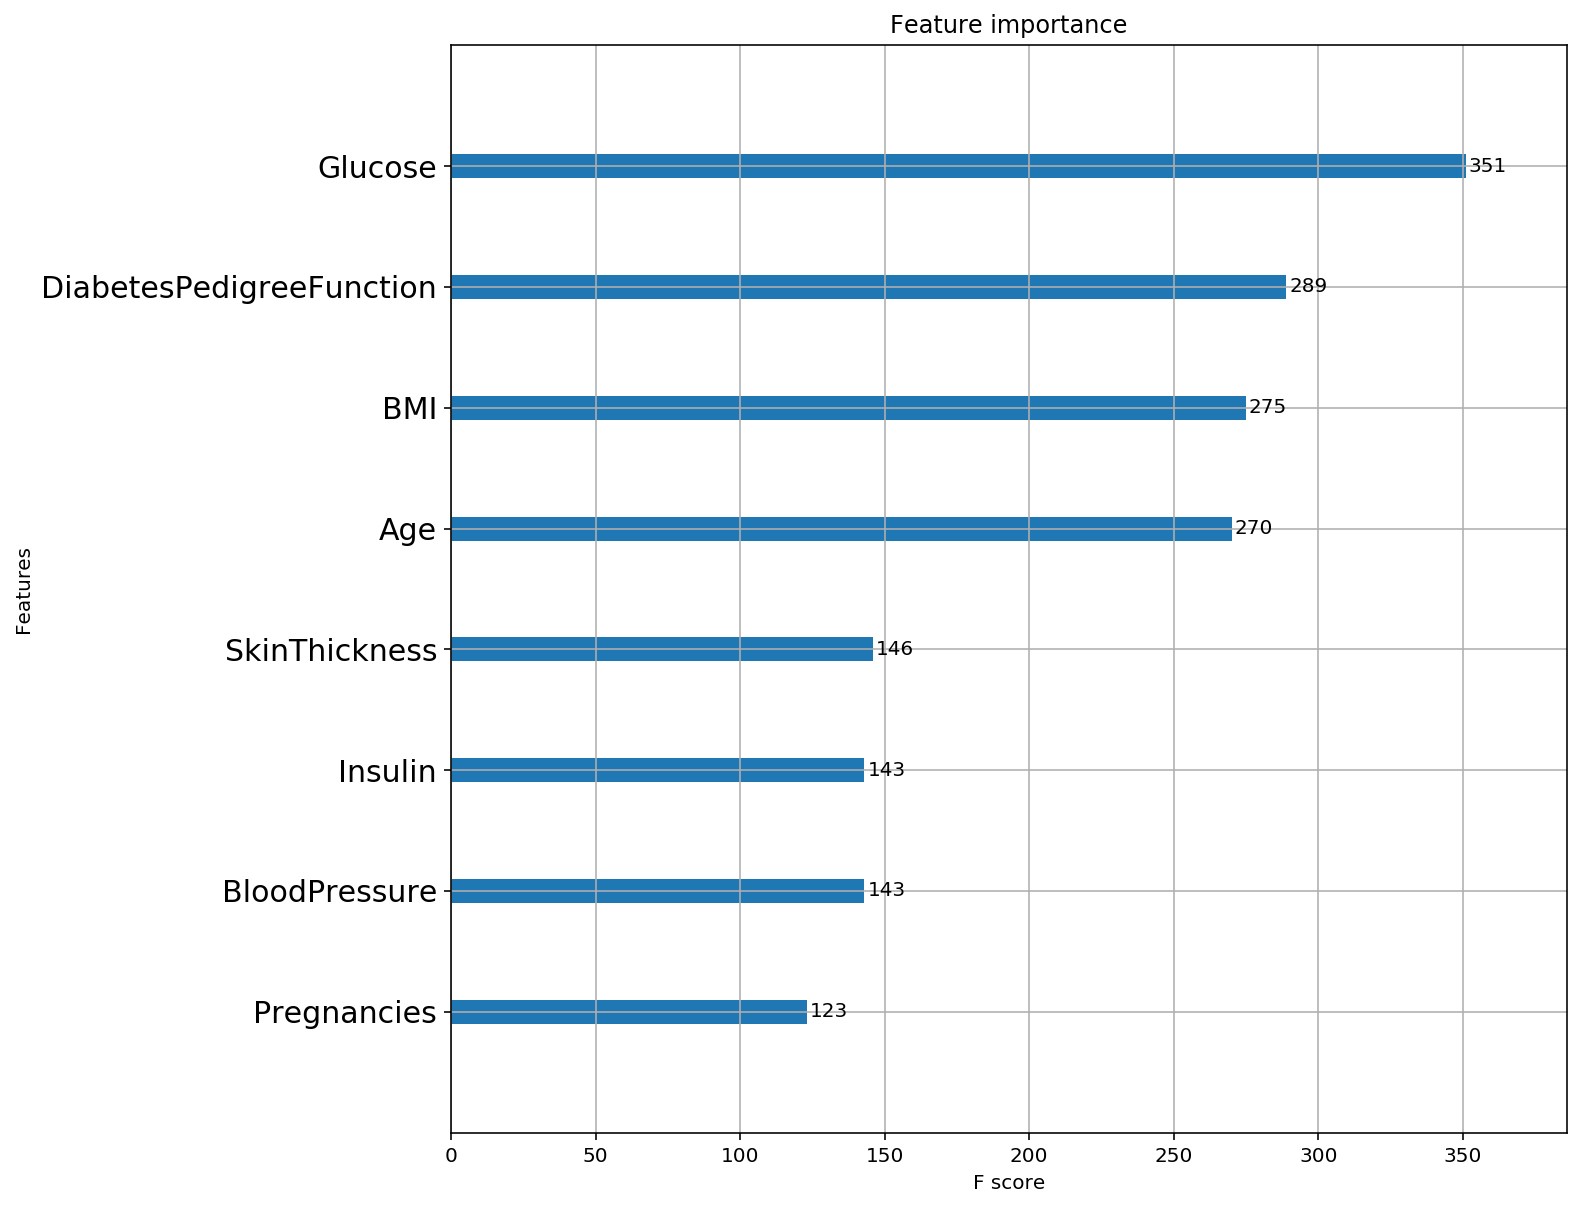

In [19]:
from xgboost import plot_importance
rcParams['figure.figsize'] = 10, 10
plot_importance(model)
plt.yticks(fontsize=15)
plt.show()

In [20]:
col_name = list(dataset.columns)[:8]
print(col_name)

one = [6, 148, 72, 35, 0, 33.6, 0.627, 50]
one_data = pd.DataFrame(one, index=col_name).T

print(model.predict(one_data))

two = {
    'Pregnancies': [6], 
    'Glucose': [148], 
    'BloodPressure': [72], 
    'SkinThickness': [35], 
    'Insulin': [0], 
    'BMI': [33.6], 
    'DiabetesPedigreeFunction': [0.627], 
    'Age': [50]
}
two_data = pd.DataFrame(two)

print(model.predict(two_data))

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
[1]
[1]


In [21]:
l = model.predict_proba(two_data)
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0], l[0][1]))

No diabetes: 23.54%
 Yes diabetes: 76.46%


In [22]:
three = {
    'Pregnancies': [1], 
    'Glucose': [161], 
    'BloodPressure': [72], 
    'SkinThickness': [35], 
    'Insulin': [0], 
    'BMI': [33.6], 
    'DiabetesPedigreeFunction': [0.527], 
    'Age': [20]
}
three_data = pd.DataFrame(three)
l = model.predict_proba(three_data)
print('No diabetes: {:.2%}\n Yes diabetes: {:.2%}'.format(l[0][0], l[0][1]))

No diabetes: 23.82%
 Yes diabetes: 76.18%


# dataset distribution through feature 'Glucose'

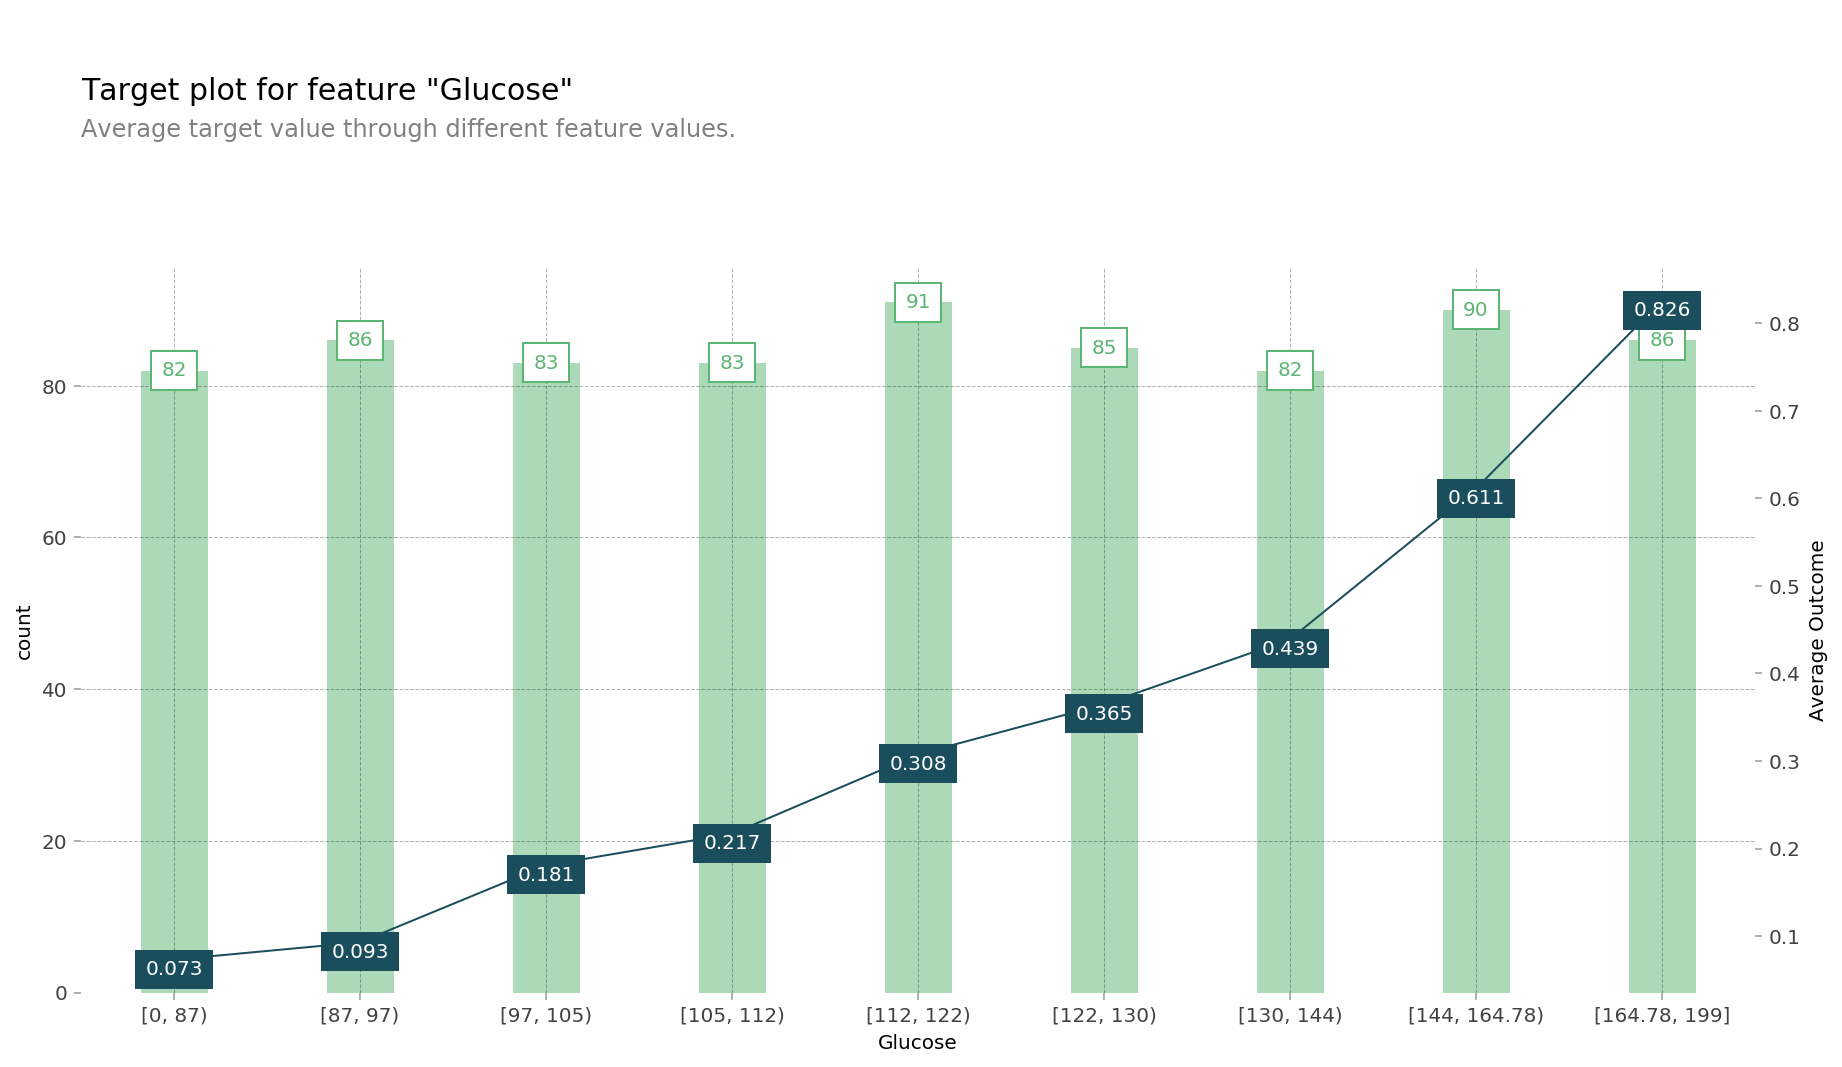

In [32]:
from pdpbox import pdp, info_plots, get_dataset

pima_data = dataset
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]

fig, axes, summary_df = info_plots.target_plot(
    df=pima_data, feature='Glucose', feature_name='Glucose', target=pima_target
)

In [33]:
summary_df

x display_column  value_lower  value_upper  count   Outcome
0  0        [0, 87)     0.000000    87.000000     82  0.073171
1  1       [87, 97)    87.000000    97.000000     86  0.093023
2  2      [97, 105)    97.000000   105.000000     83  0.180723
3  3     [105, 112)   105.000000   112.000000     83  0.216867
4  4     [112, 122)   112.000000   122.000000     91  0.307692
5  5     [122, 130)   122.000000   130.000000     85  0.364706
6  6     [130, 144)   130.000000   144.000000     82  0.439024
7  7  [144, 164.78)   144.000000   164.777778     90  0.611111
8  8  [164.78, 199]   164.777778   199.000000     86  0.825581

# dataset distribution through feature 'BloodPressure'

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


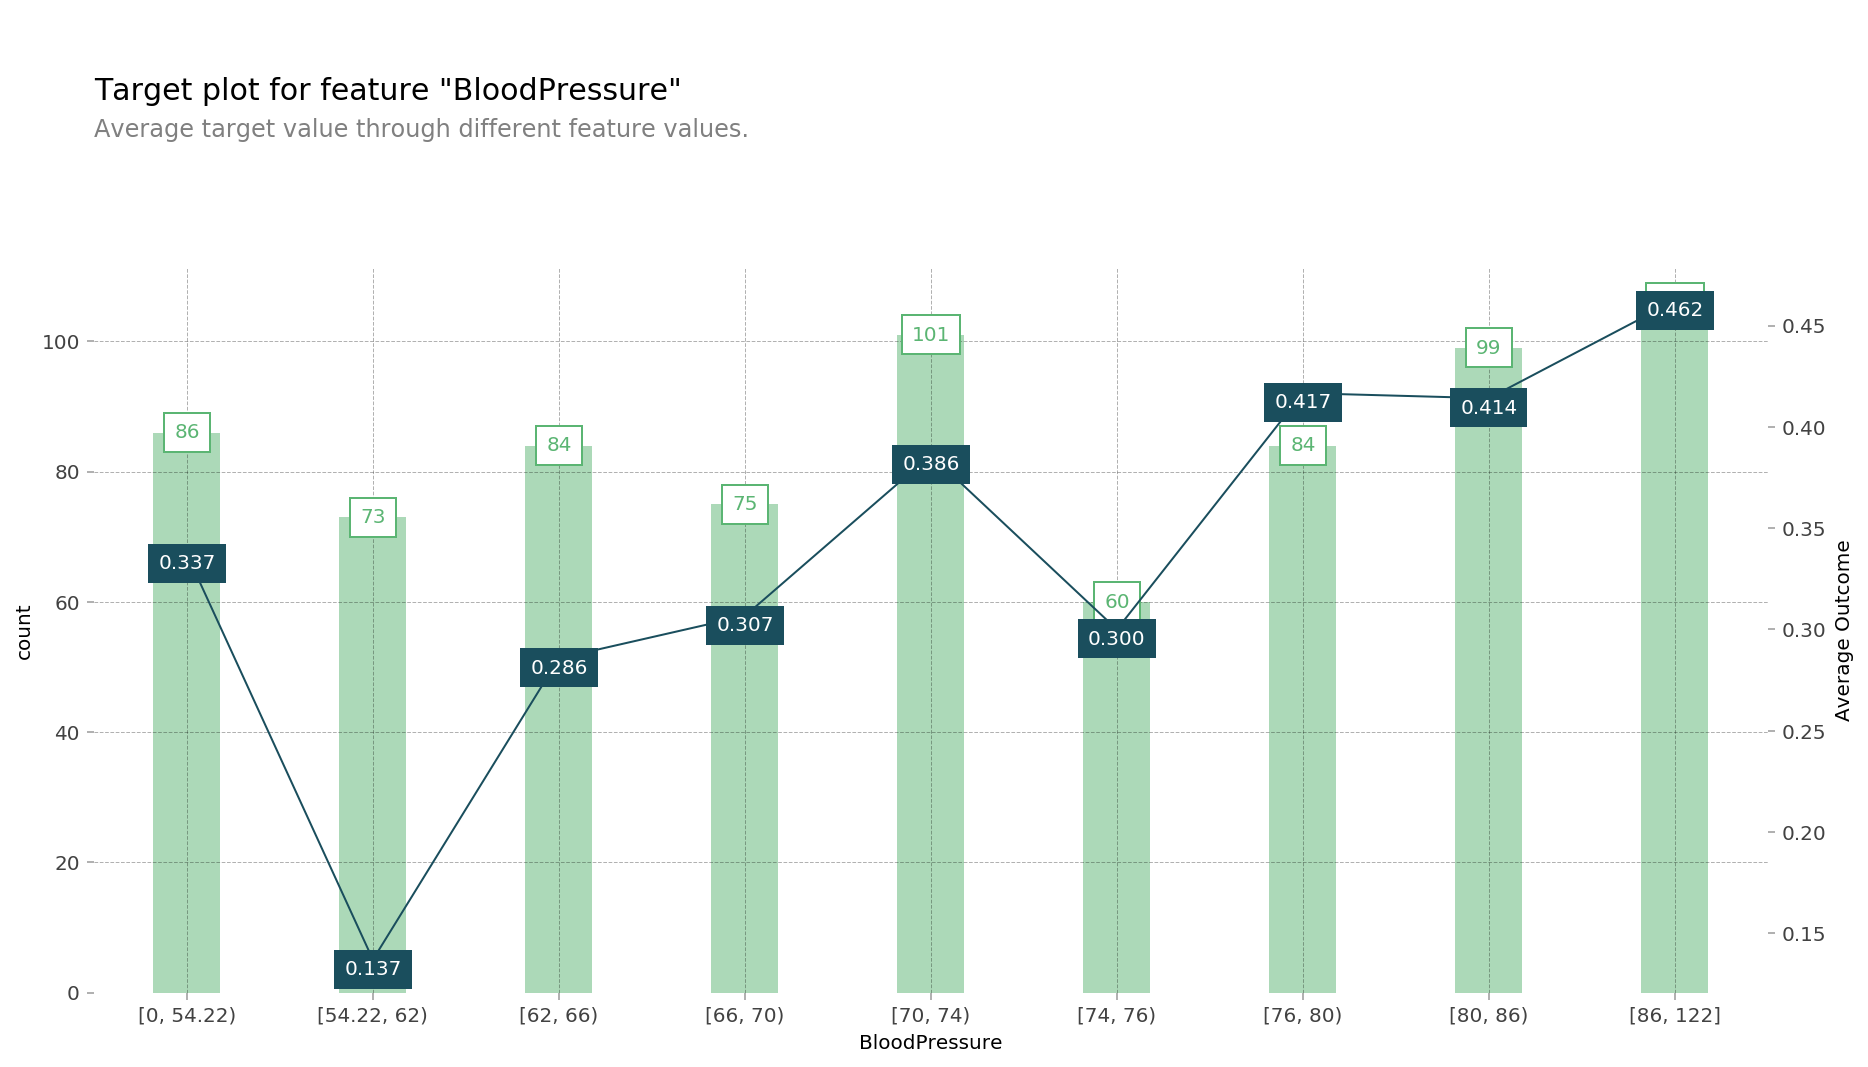

In [30]:
pima_data = dataset
pima_features = dataset.columns[:8]
pima_target = dataset.columns[8]

fig, axes, summary_df = info_plots.target_plot(
    df=pima_data, feature='BloodPressure', feature_name='BloodPressure', target=pima_target
)

In [16]:
summary_df

x display_column  value_lower  value_upper  count   Outcome
0  0     [0, 54.22)     0.000000    54.222222     86  0.337209
1  1    [54.22, 62)    54.222222    62.000000     73  0.136986
2  2       [62, 66)    62.000000    66.000000     84  0.285714
3  3       [66, 70)    66.000000    70.000000     75  0.306667
4  4       [70, 74)    70.000000    74.000000    101  0.386139
5  5       [74, 76)    74.000000    76.000000     60  0.300000
6  6       [76, 80)    76.000000    80.000000     84  0.416667
7  7       [80, 86)    80.000000    86.000000     99  0.414141
8  8      [86, 122]    86.000000   122.000000    106  0.462264

# Check predition distribution through 'Glucose'

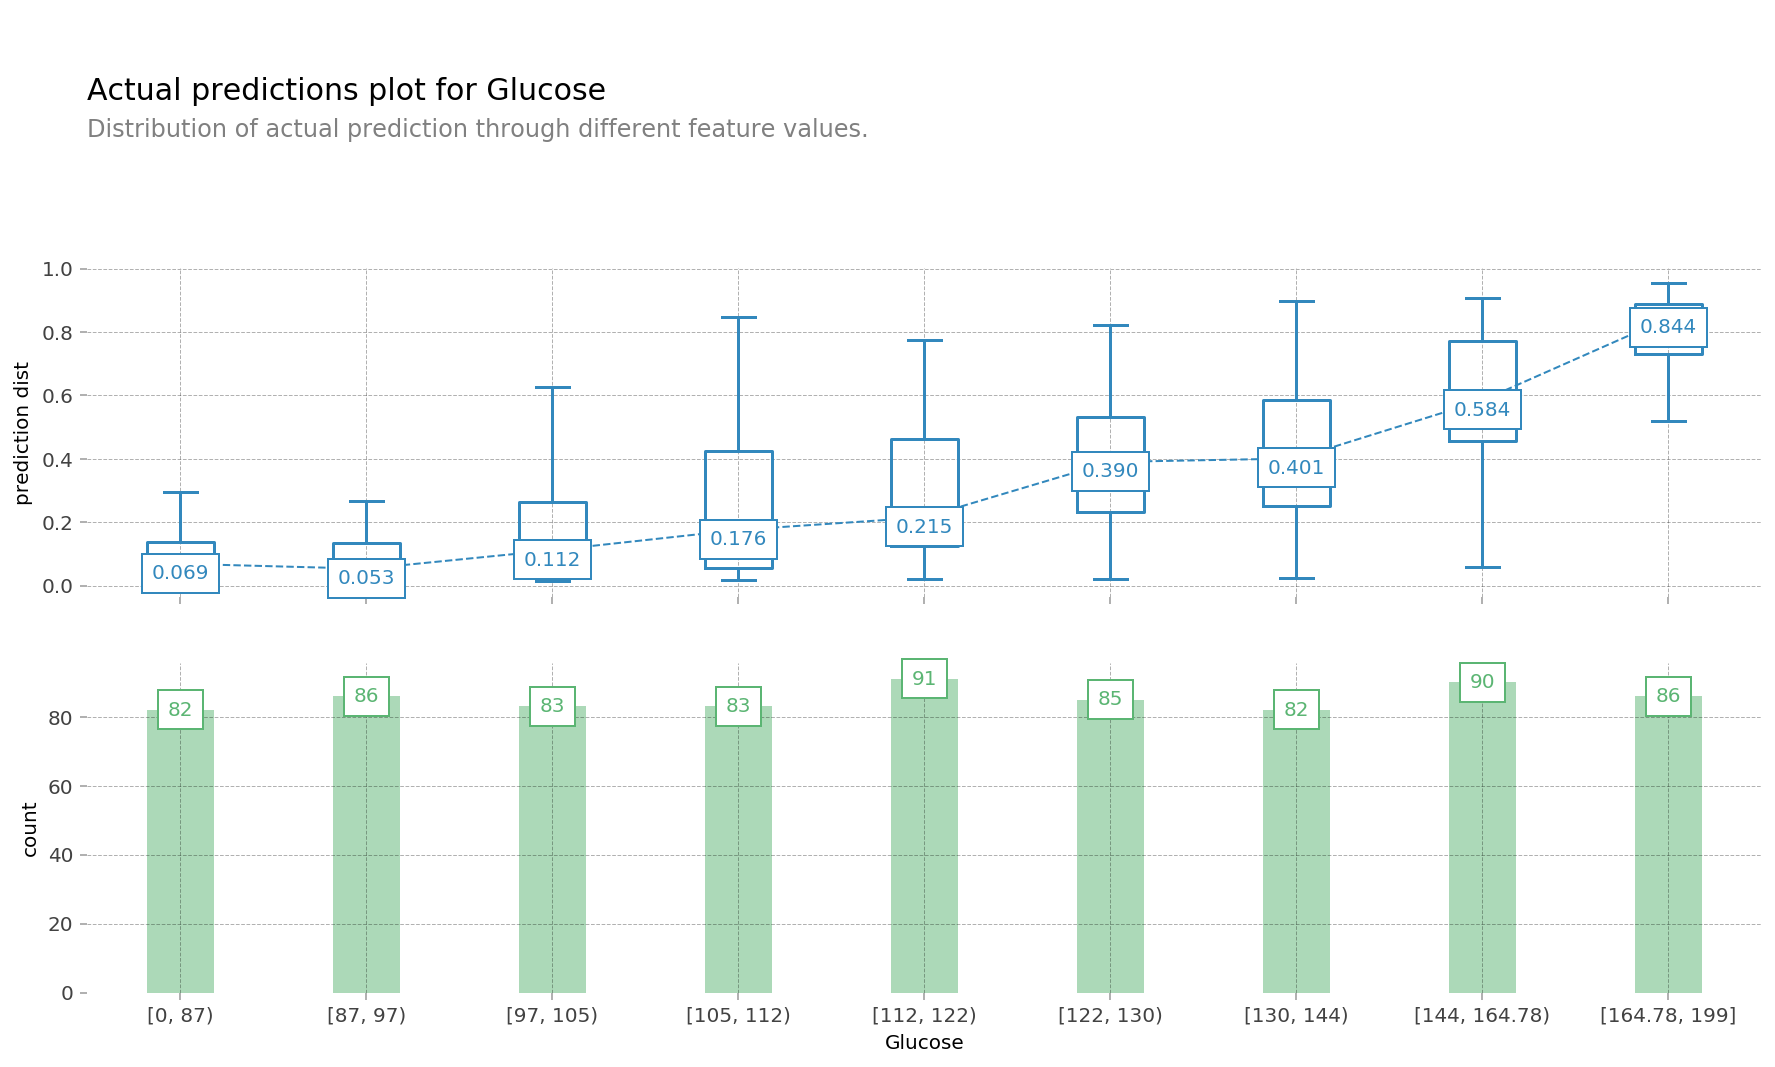

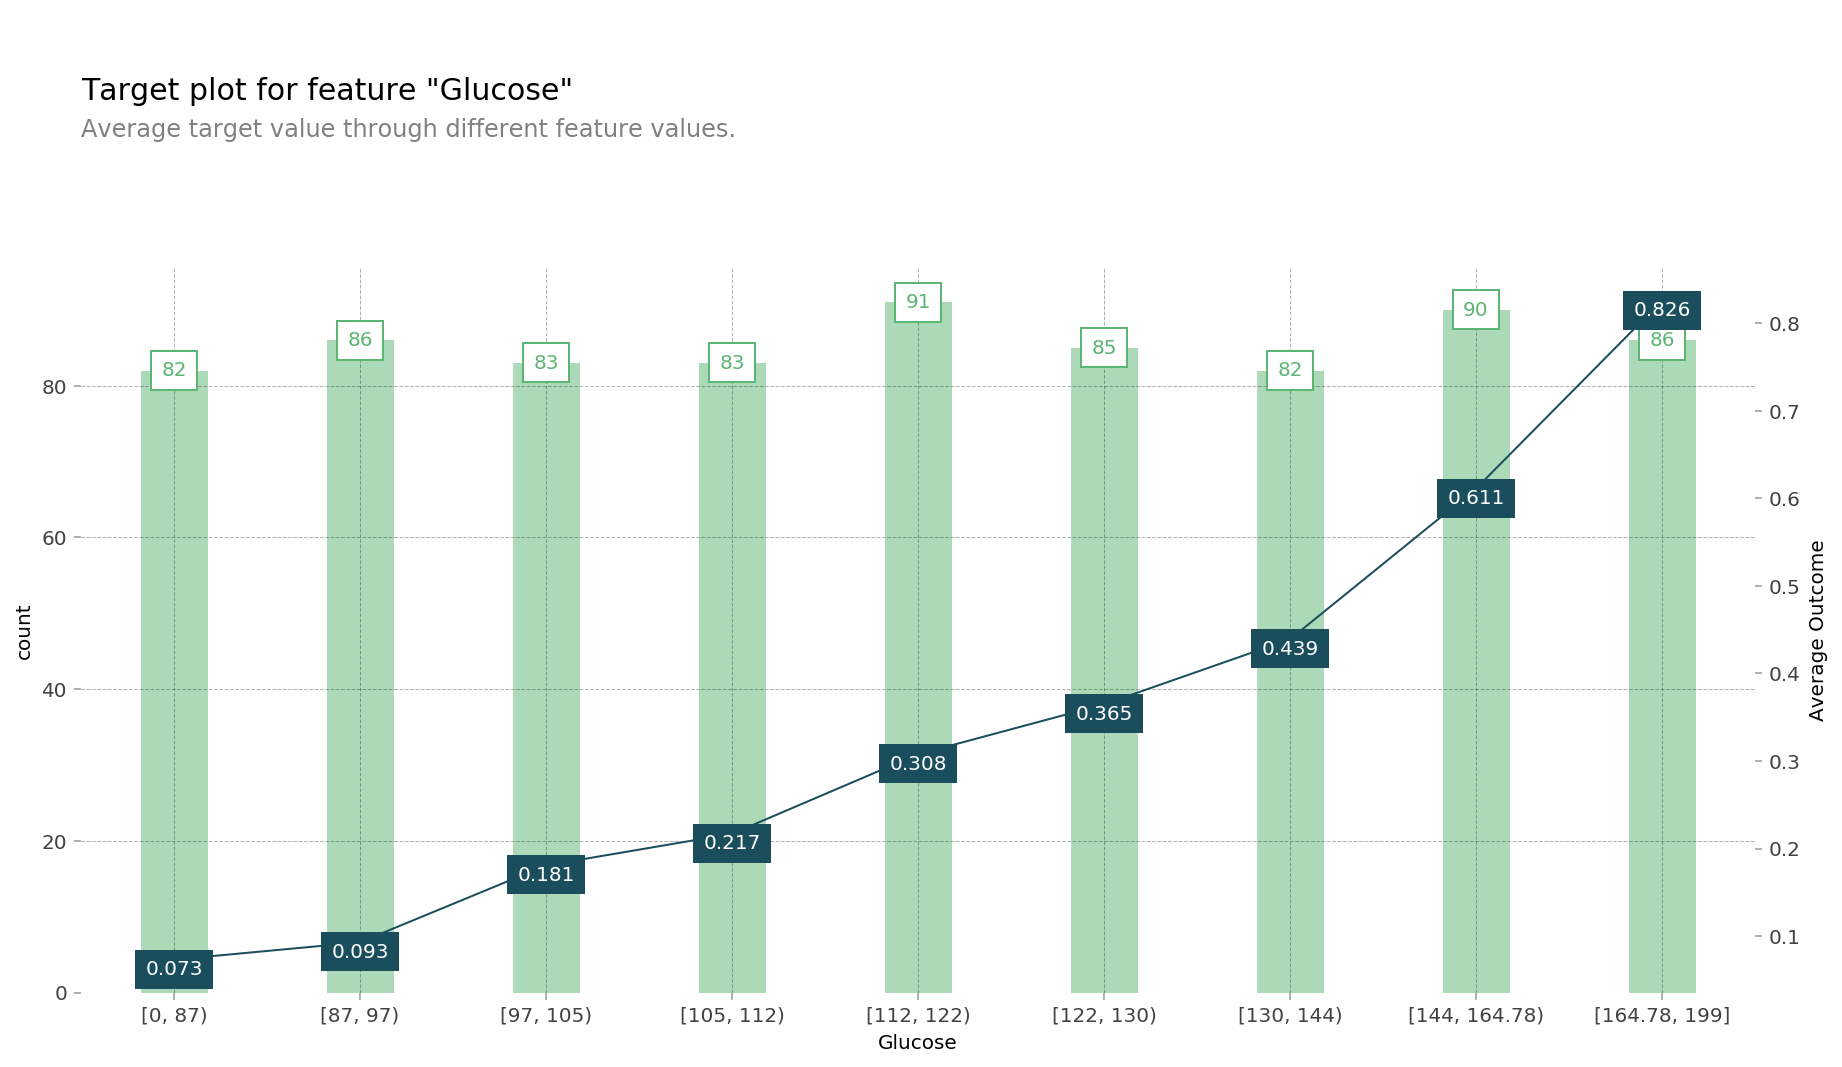

In [35]:
fig, axes, summary_df = info_plots.actual_plot(
    model=model, 
    X=pima_data[pima_features], 
    feature='Glucose', 
    feature_name='Glucose', 
    predict_kwds={}
)

fig, axes, summary_df = info_plots.target_plot(
    df=pima_data, feature='Glucose', feature_name='Glucose', target=pima_target
)

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


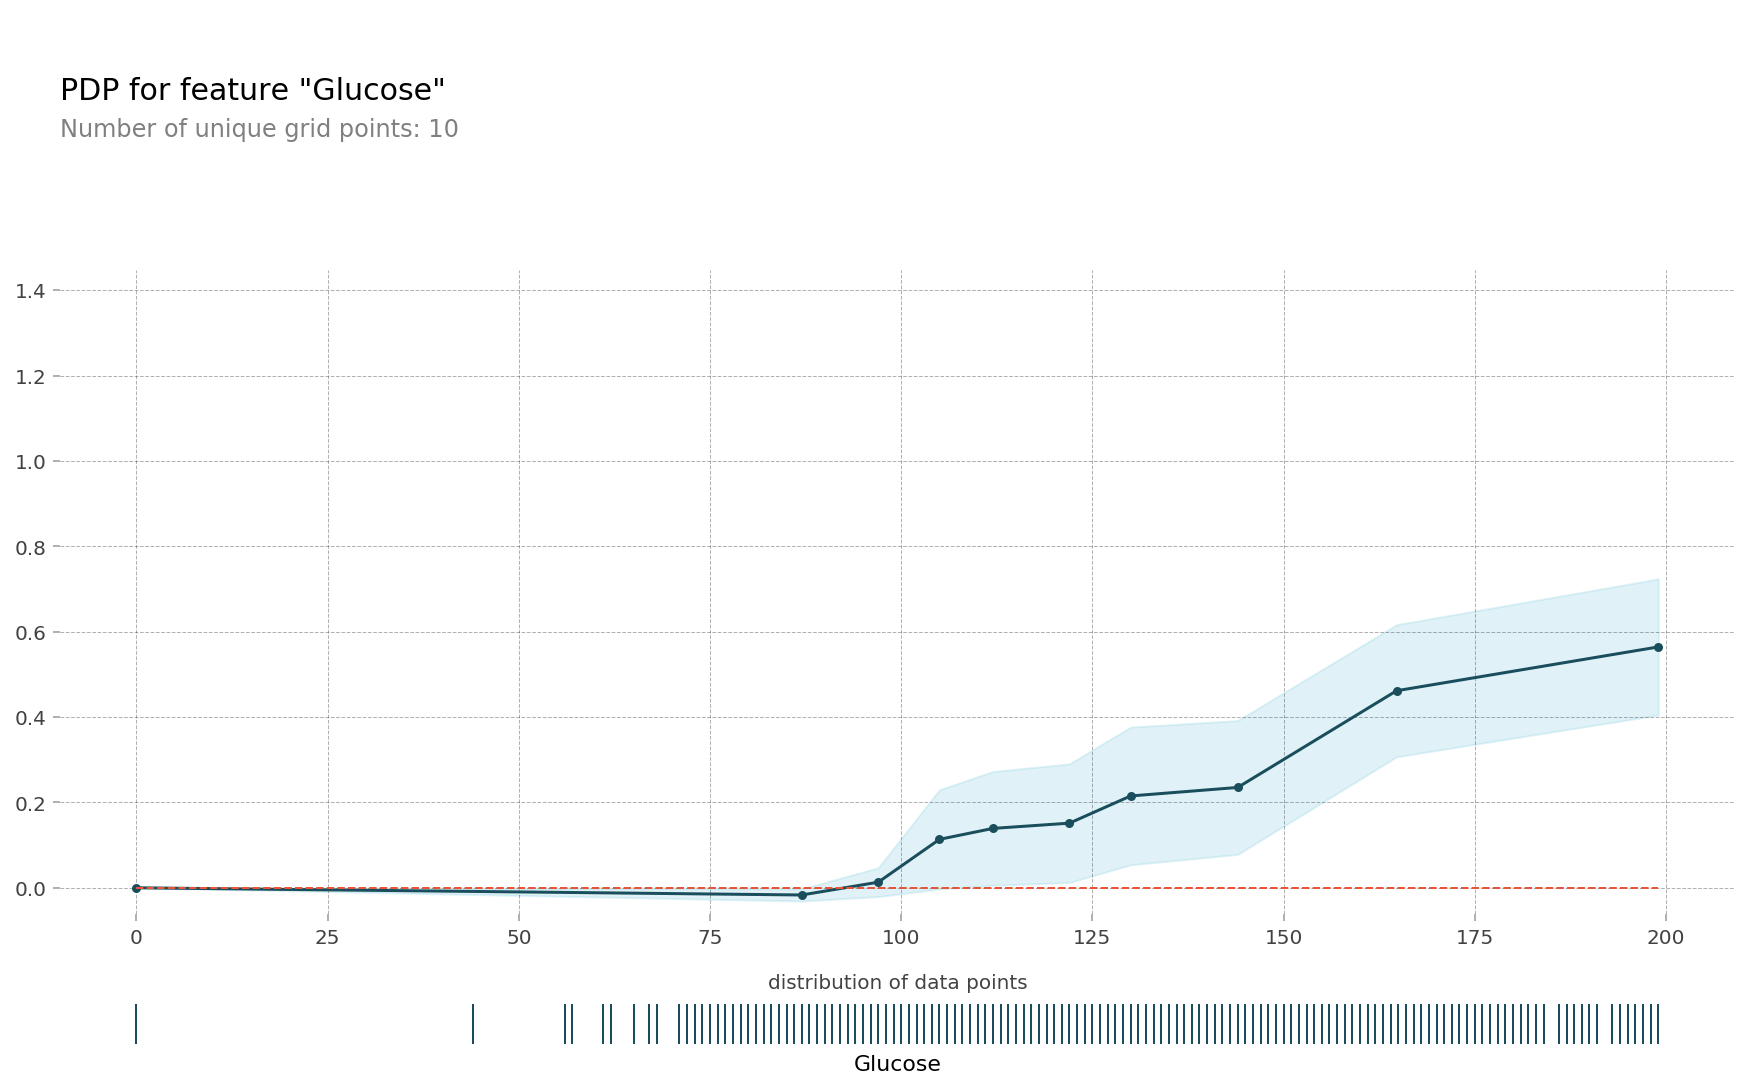

In [36]:
pdp_gc = pdp.pdp_isolate(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features,
    feature='Glucose'
)

#  plot information
fig, axes = pdp.pdp_plot(
    pdp_gc, 
    'Glucose', 
    plot_lines=False, 
    frac_to_plot=0.5, 
    plot_pts_dist=True
)

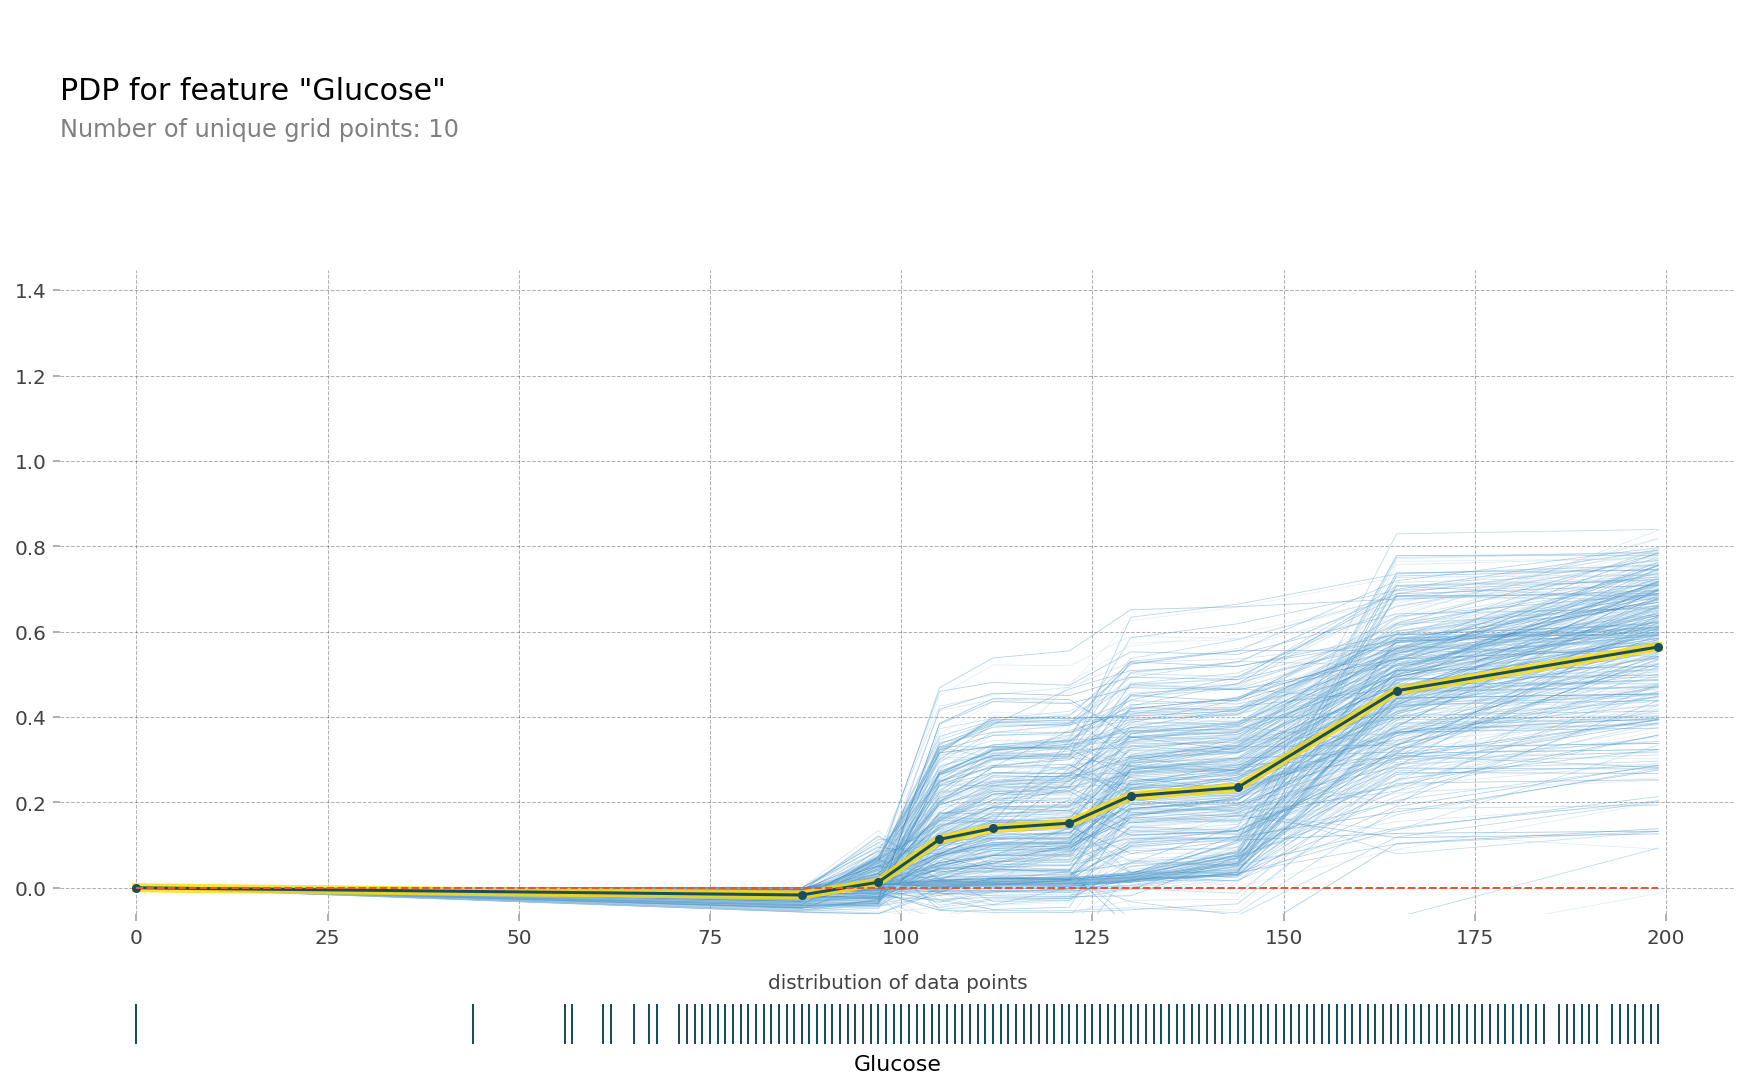

In [37]:
pdp_gc = pdp.pdp_isolate(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features,
    feature='Glucose'
)

#  plot information
fig, axes = pdp.pdp_plot(
    pdp_gc, 
    'Glucose', 
    plot_lines=True, 
    frac_to_plot=0.5, 
    plot_pts_dist=True
)

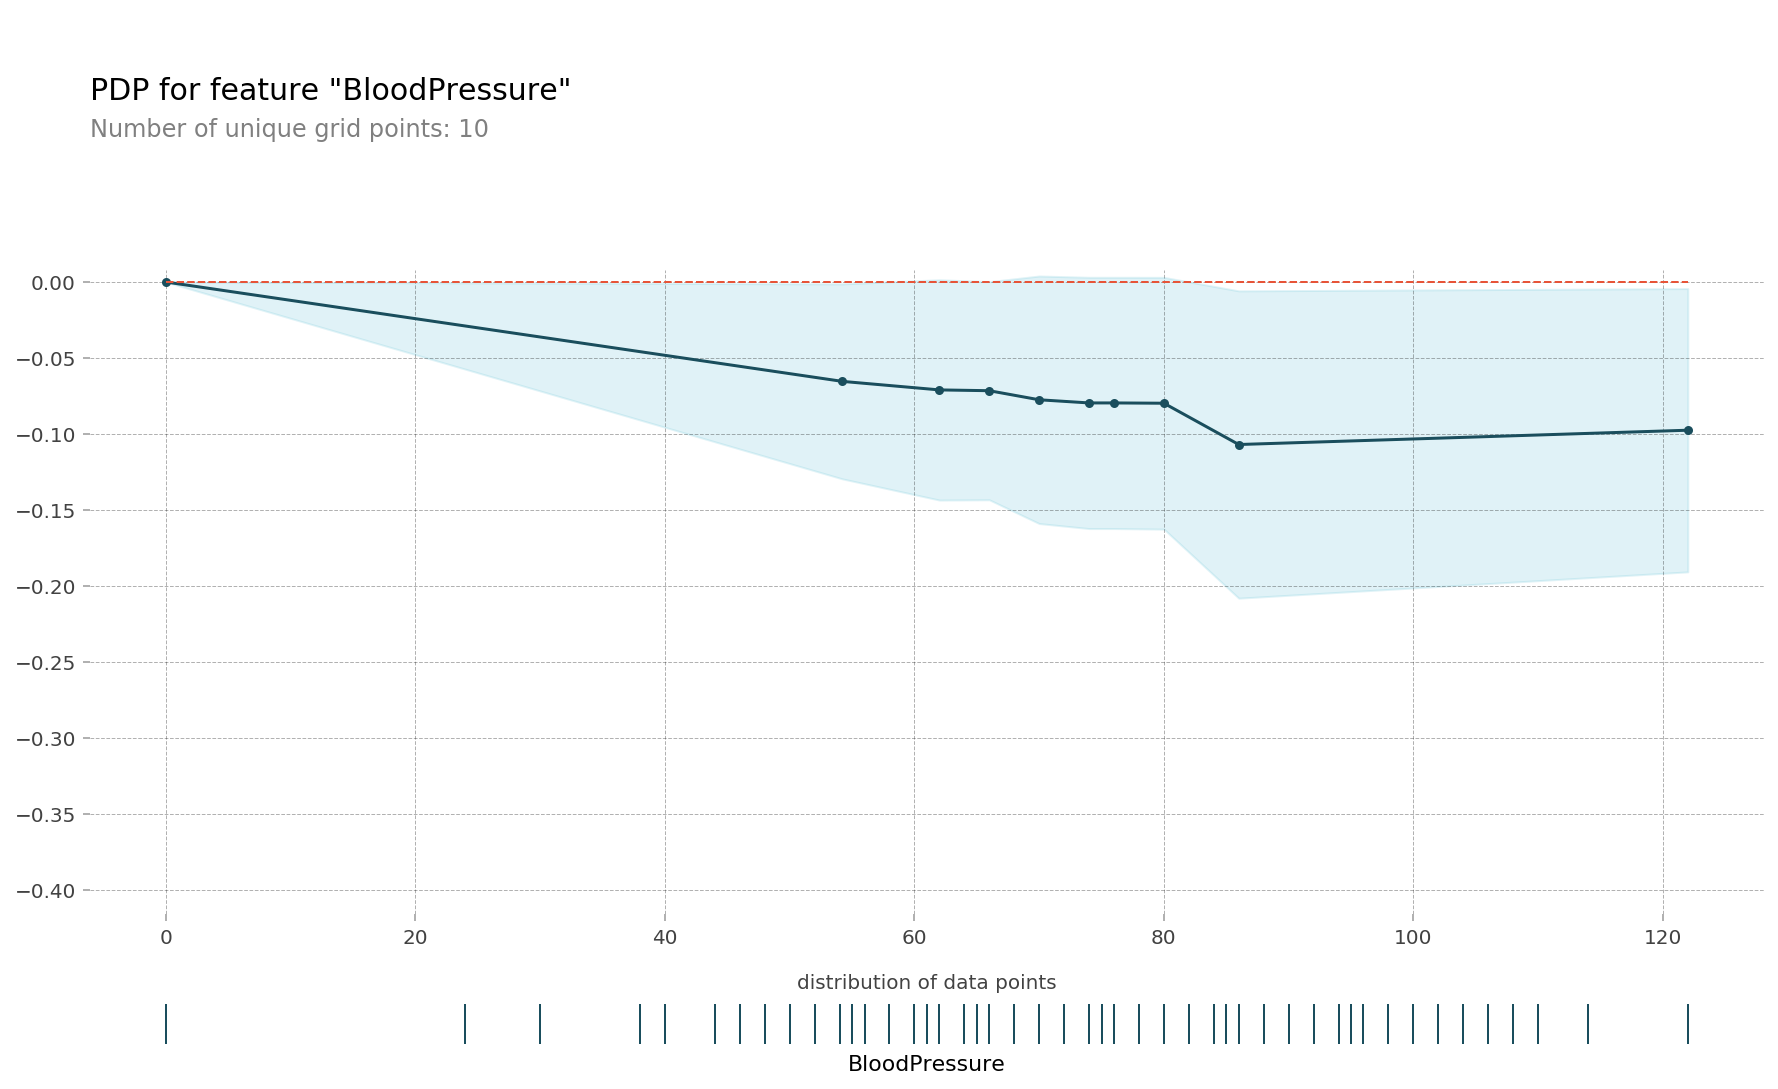

In [38]:
# calculate model with BloodPressure to express pdp
pdp_bp = pdp.pdp_isolate(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features, 
    feature='BloodPressure'
)
# plot PDP on BloodPressure
fig, axes = pdp.pdp_plot(pdp_bp, 
                         'BloodPressure', 
                         plot_lines=False, 
                         frac_to_plot=0.5, 
                         plot_pts_dist=True)

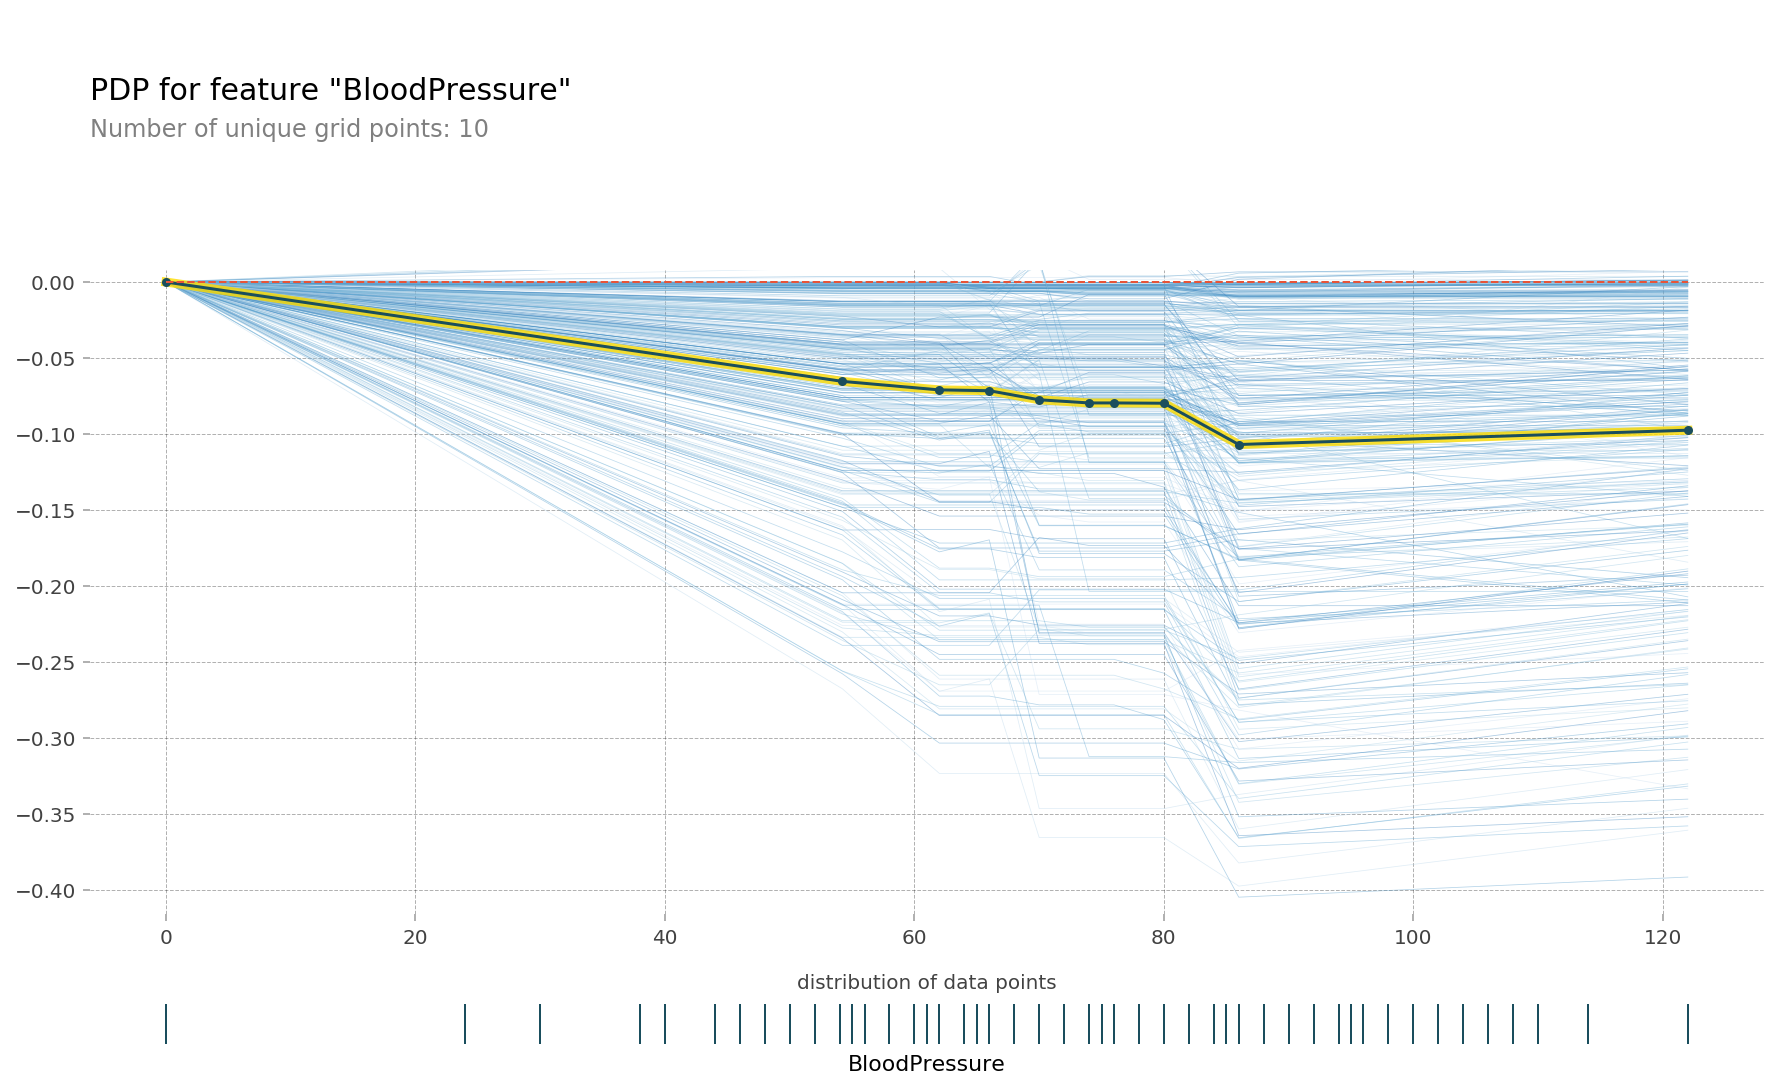

In [39]:
# calculate model with BloodPressure to express pdp
pdp_bp = pdp.pdp_isolate(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features, 
    feature='BloodPressure'
)
# plot PDP on BloodPressure
fig, axes = pdp.pdp_plot(pdp_bp, 
                         'BloodPressure', 
                         plot_lines=True, 
                         frac_to_plot=0.5, 
                         plot_pts_dist=True)

# Target distribution between two variables

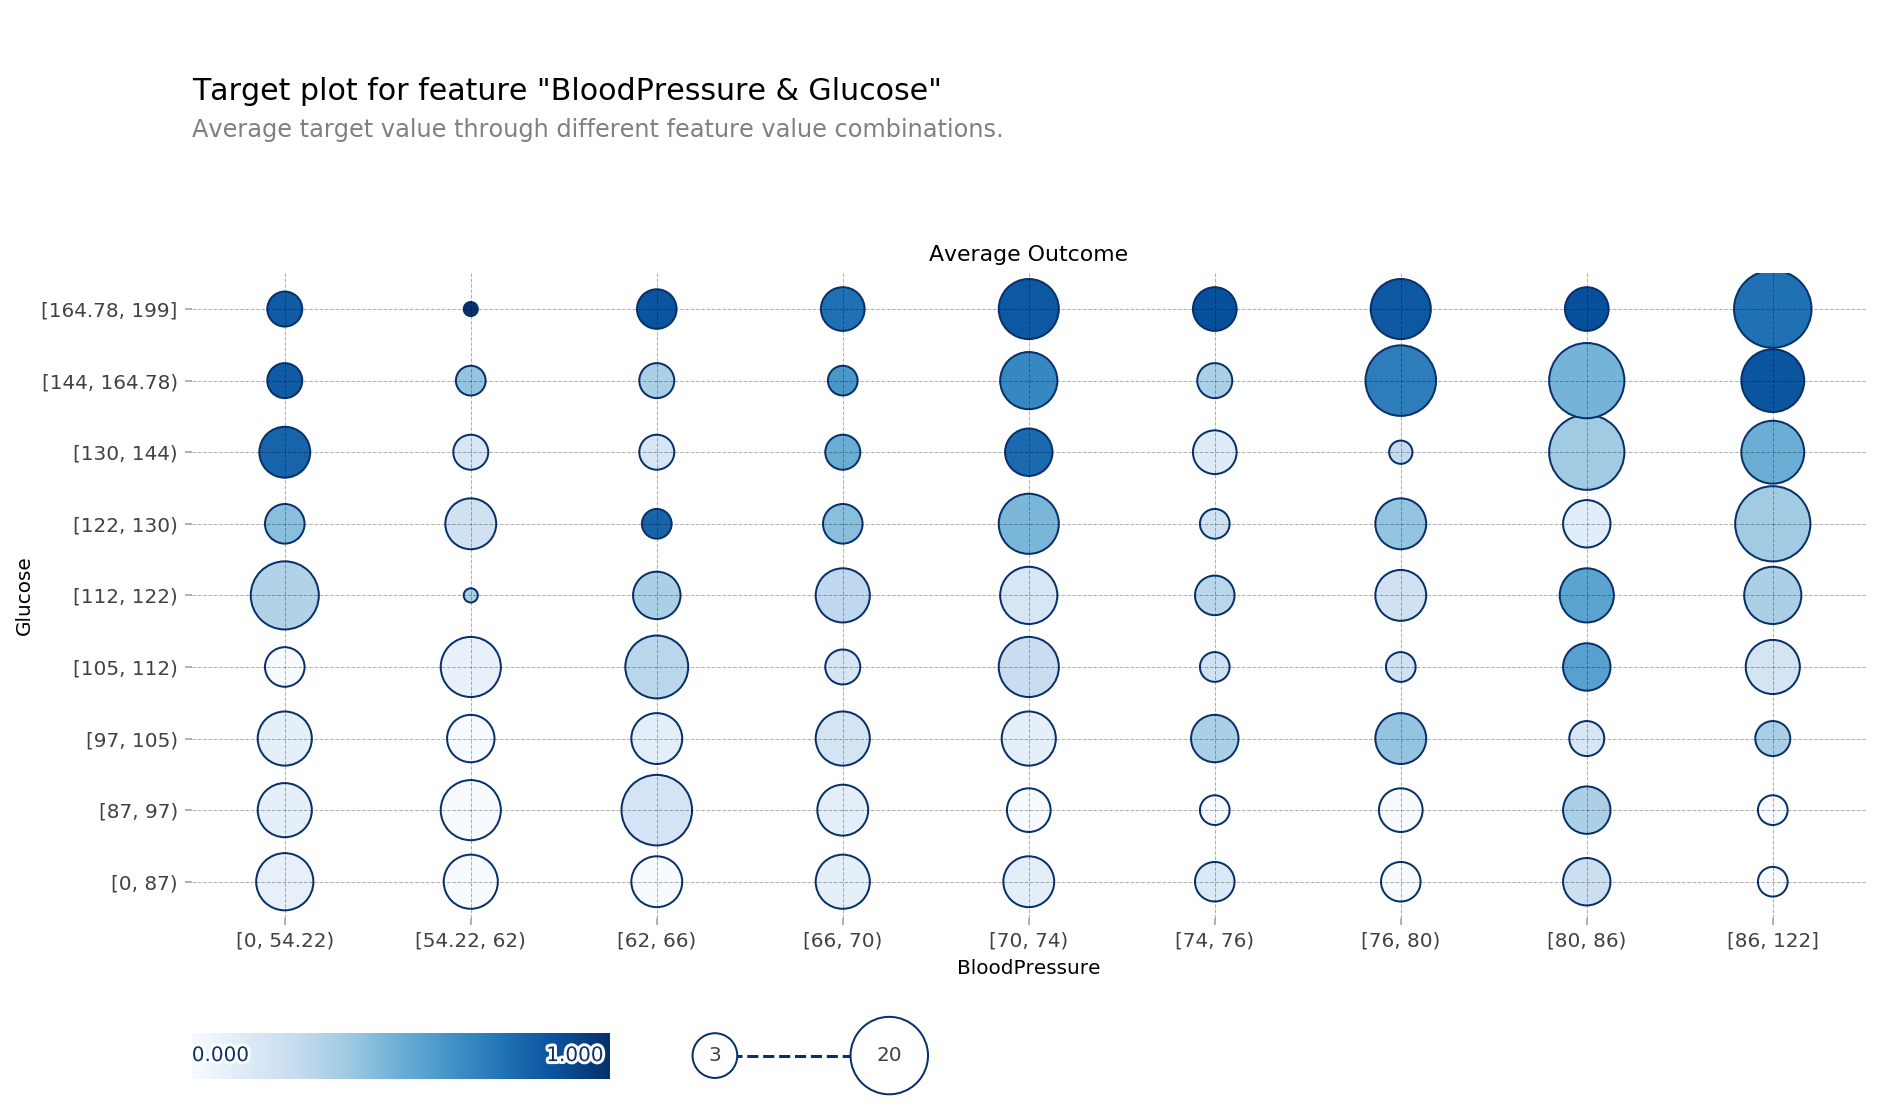

In [40]:
fig, axes, summary_df = info_plots.target_plot_interact(
    df=pima_data, 
    features=['BloodPressure', 'Glucose'], 
    feature_names=['BloodPressure', 'Glucose'], 
    target=pima_target
)

# pdp for feature combination of 'BP' and 'BMI'
https://github.com/SauceCat/PDPbox/blob/master/tutorials/pdpbox_binary_classification.ipynb

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

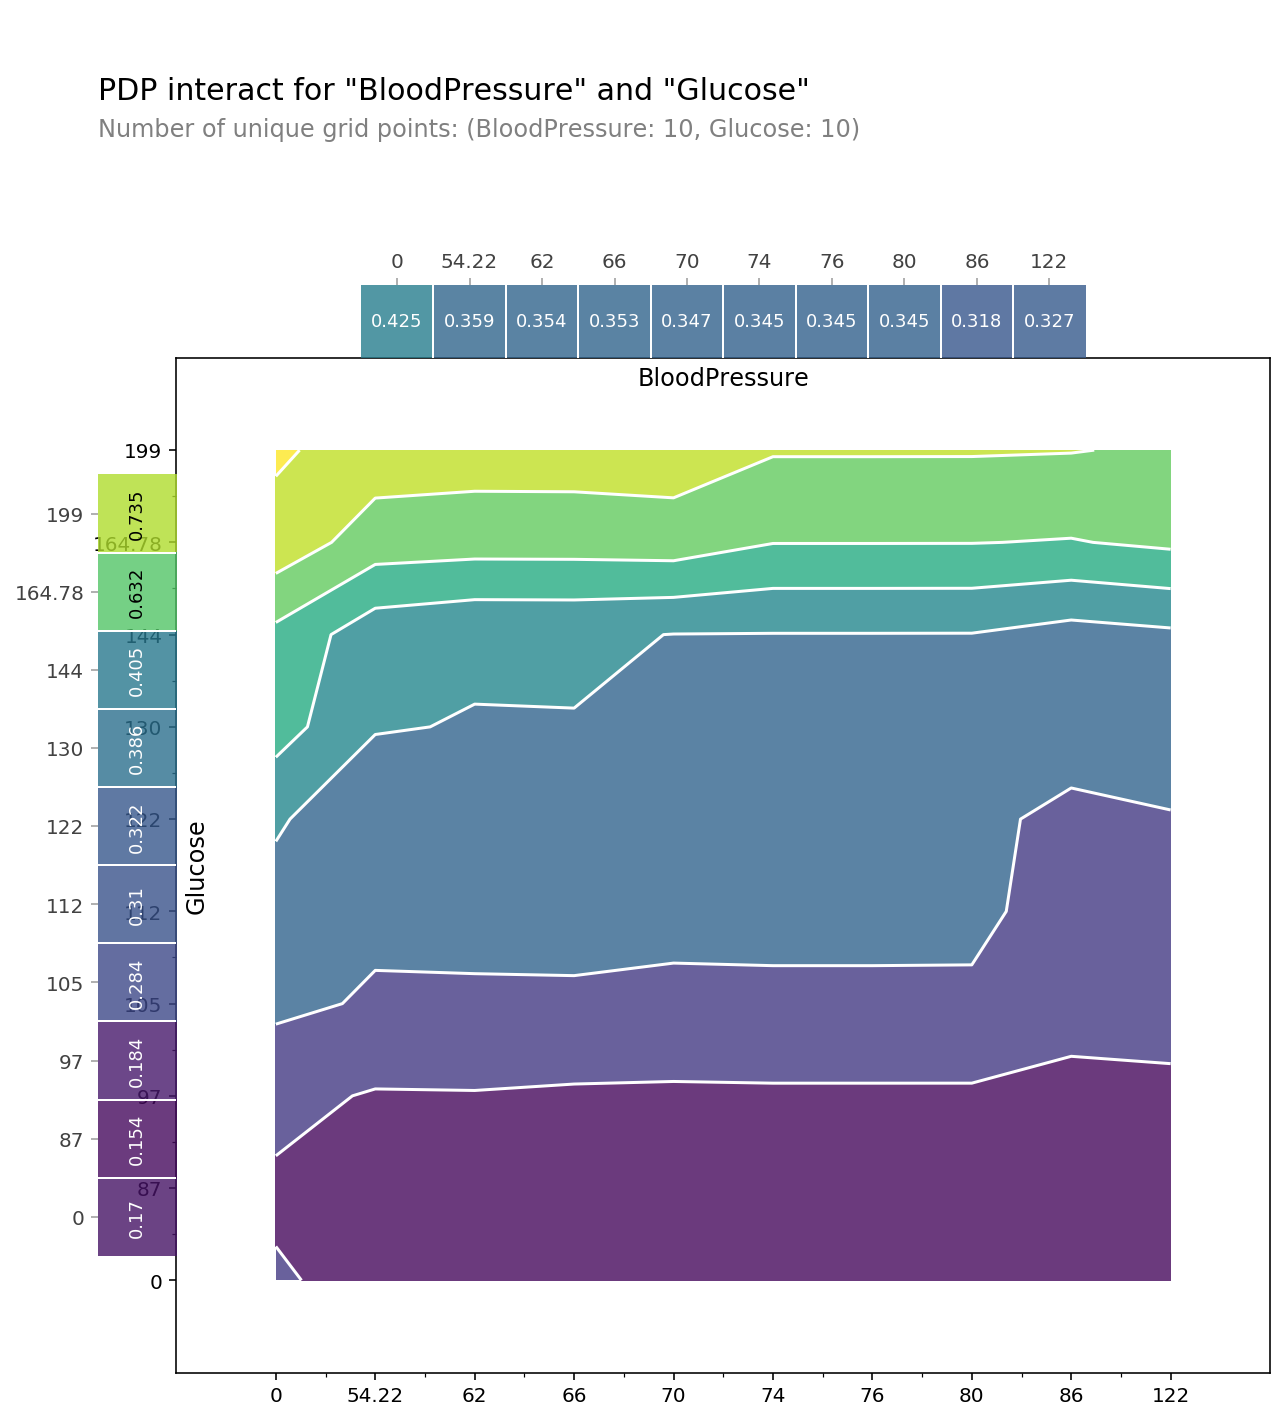

In [45]:
pdp_intertatcion = pdp.pdp_interact(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features, 
    features=['BloodPressure', 'Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_intertatcion, 
    feature_names=['BloodPressure', 'Glucose'], 
    plot_type='contour', 
    x_quantile=True, 
    plot_pdp=True
)

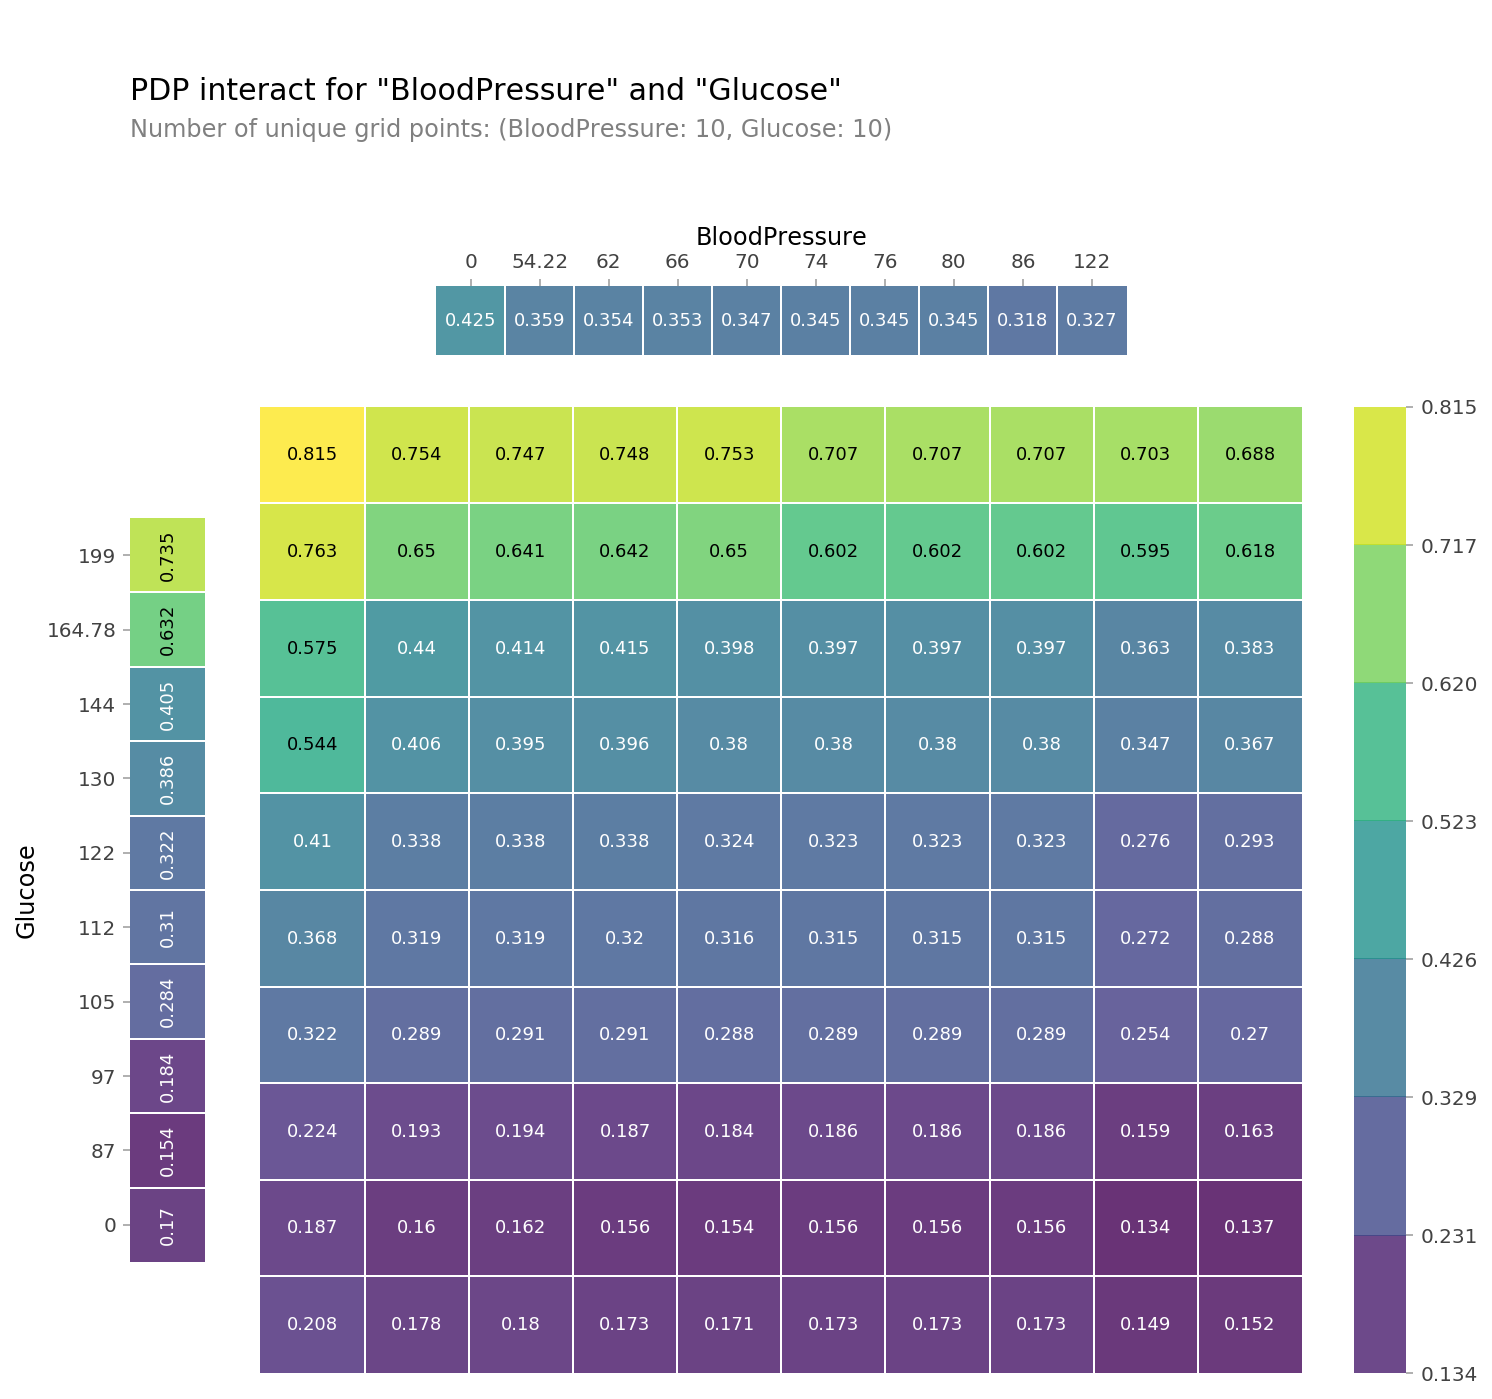

In [47]:
pdp_intertatcion = pdp.pdp_interact(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features, 
    features=['BloodPressure', 'Glucose']
)

fig, axes = pdp.pdp_interact_plot(
    pdp_interact_out=pdp_intertatcion, 
    feature_names=['BloodPressure', 'Glucose'], 
    plot_type='grid', 
    x_quantile=True, 
    plot_pdp=True
)

TypeError: clabel() got an unexpected keyword argument 'contour_label_fontsize'

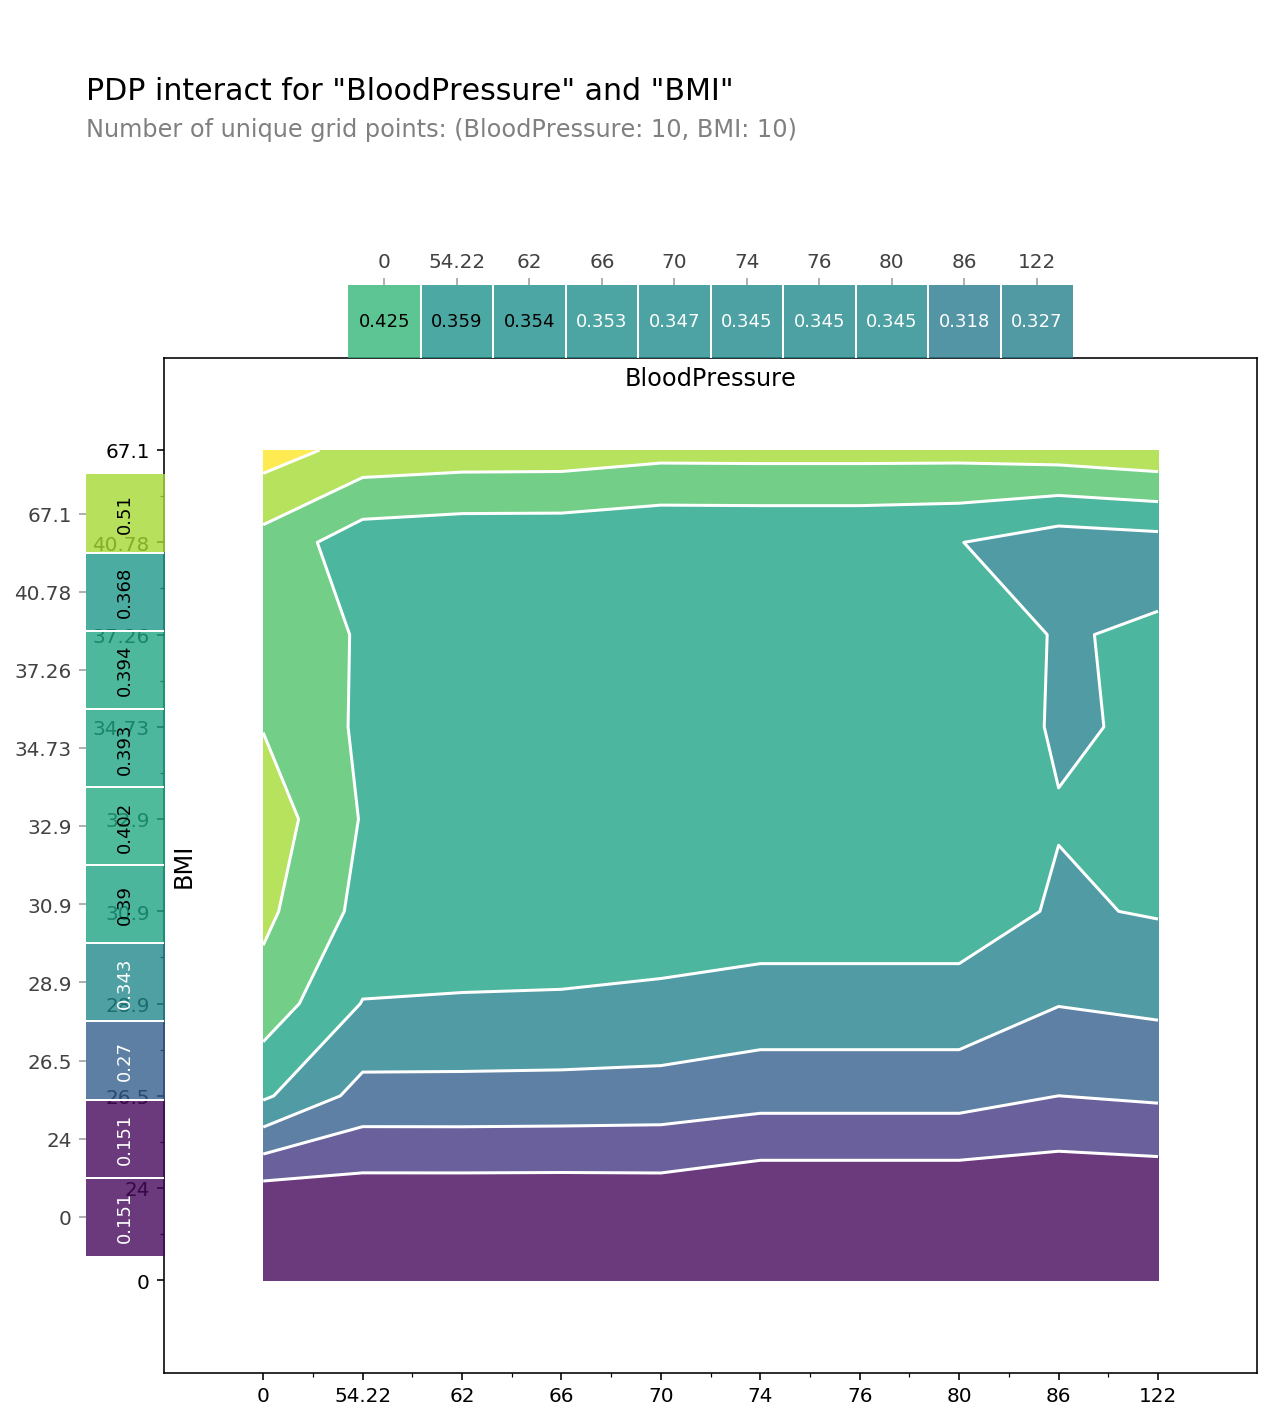

In [46]:
pdp_gb = pdp.pdp_interact(
    model=model, 
    dataset=pima_data, 
    model_features=pima_features, 
    features=['BloodPressure', 'BMI']
)

fig, axes = pdp.pdp_interact_plot(pdp_gb, 
                                  ['BloodPressure', 'BMI'], 
                                  plot_type='contour', 
                                  x_quantile=True, 
                                  plot_pdp=True)

In [48]:
fig, axes = pdp.pdp_interact_plot(pdp_intertatcion, 
                                  ['BloodPressure', 'Glucose'], 
                                  plot_type='grid', 
                                  x_quantile=True, 
                                  plot_pdp=False)